<a href="https://colab.research.google.com/github/raudh1/ShellModels/blob/main/shell_model_prove_N20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.offsetbox import AnchoredText
from scipy.integrate import solve_ivp

from scipy.integrate import complex_ode
from matplotlib import pyplot
import seaborn as sns

In [4]:
N=20
knn=np.power(2,np.arange(N+4))
kn=knn*np.power(2,-4.)


In [91]:
def shellmodel(t, u):
      nu=1.5e-8
      an=np.ones(N+4)
      bn=-0.5*np.ones(N+4)
      cn=-0.5*np.ones(N+4)
      fn=np.zeros(N+4,dtype=complex)
      #cn=np.zeros(N+4)
      #cn=(1.-bn)


      an[N+3]=0.
      an[N+2]=0.

      bn[0]=0.
      bn[N+3]=0.

      cn[0]=0.
      cn[1]=0.

      fn[4]=(1.+1.j)*6.e-5
      res=np.zeros((N+4),dtype=complex)
      #a,b,c=-1.,0.5,0.5
      #print((2,N+2),res.shape[0])

      eta=np.power(nu**3/(np.abs(fn[3])),1/4.)
      #print(1/eta)

      for i in range(2, N+2):
          #SABRA U
          #print(i)                                                                        cambiato da i-3
          #                                                                                       |
          #                                                                                       v
          res[i]=1j*(an[i-2]*kn[i+1]*u[i+2]*np.conjugate(u[i+1])+bn[i-2]*kn[i]*u[i+1]*np.conjugate(u[i-1])-cn[i-2]*kn[i-1]*u[i-1]*u[i-2])+fn[i]-nu*kn[i]**2*u[i] 
      return  res


In [92]:
nu=1.5e-8
fn=(1.+1j)*6.e-5
eta=np.power(nu**3/(np.abs(fn)),1/4.)
print(1/eta)

70810.57447478114


In [93]:
taueta=np.power(nu/(np.abs(fn)),0.5)
print(taueta)

0.013295739742362471


In [59]:
kn

array([6.25000e-02, 1.25000e-01, 2.50000e-01, 5.00000e-01, 1.00000e+00,
       2.00000e+00, 4.00000e+00, 8.00000e+00, 1.60000e+01, 3.20000e+01,
       6.40000e+01, 1.28000e+02, 2.56000e+02, 5.12000e+02, 1.02400e+03,
       2.04800e+03, 4.09600e+03, 8.19200e+03, 1.63840e+04, 3.27680e+04,
       6.55360e+04, 1.31072e+05, 2.62144e+05, 5.24288e+05])

In [121]:
Un=1e-3*kn**(-1)*(1.+1.j)*np.ones(N+4,dtype=complex)
Un2=np.load('./Uf.npy')
Un2=Un2[:,-1]
#u0=1j*np.ones((2*(N+4)))
u0=np.array(Un2)
#u0=u0.reshape(1,2*(N+4))
#u20=2*np.ones(N)

t=0
r = complex_ode(shellmodel).set_integrator('vode', method='bdf',order='2')
r.set_initial_value(u0,0)
t1 = 1000
dt = 5e-2
#print(r.successful(),r.t,t1)
i=0
a=[]
while r.successful() and r.t < t1:
      r.t
      a.append(r.integrate(r.t+dt))
      i=i+1
      if (i%50000==0):
        print(np.mean(np.sum((np.transpose(a)*np.conj(np.transpose(a))).real,axis=0)))
        print(i)
Uf=np.transpose(a)
np.save('./Uf',Uf)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in double_scalars


In [96]:
np.save('./Uf',Uf)

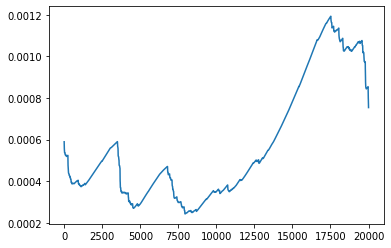

In [122]:
Uf2=Uf[2:-2]
Energy=np.sum((Uf2*np.conj(Uf2)).real,axis=0)
plt.plot((Energy))
#plt.loglog()
#plt.plot(np.sum((Un*np.conj(Un)).real,axis=0))

#plt.ylim(Energy[0],4.266e-5)
#plt.xlim(0,20)
plt.show()

In [ ]:
Un[3]

(0.02+0.02j)

In [124]:
epsilon=2*np.real(np.mean(np.conj(Uf[4])*fn))
epsilon

2.3373832549366277e-06

In [125]:
eta=np.power(nu**3/(epsilon),1/4.)
eta2=np.power(nu**3/(np.abs(fn)),1/4.)
print(1/eta,1/eta2)

28847.888966549606 70810.57447478114


In [ ]:
#print(np.mean((Uf*np.conj(Uf)),1),Uf[2].shape[:])

In [ ]:
#print(Uf.shape[:],Un.shape[:])

In [ ]:
#plt.plot(kn,(Un*np.conj(Un)).real,'bo')
#plt.loglog()
#plt.show()

In [126]:
#Uf_stat.shape[:]
#Uf_stat=Uf
Uf_stat=Uf[:,:]
#Uf_stat_old=np.load('./Uf_stat.npy')


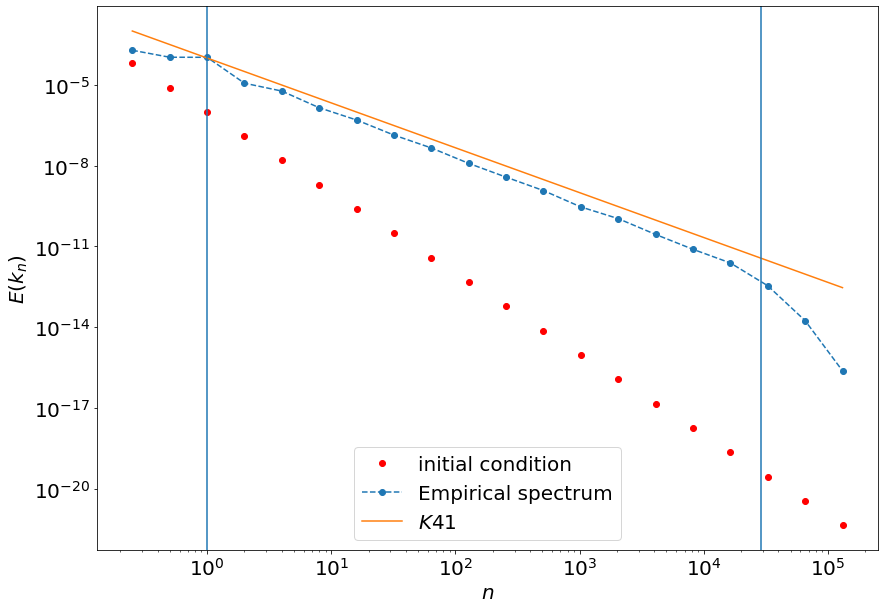

In [127]:
plt.figure(figsize=(14,10))
plt.plot(kn[2:-2],(Un*np.conj(Un)).real[2:-2]/(2*kn[2:-2]),'ro',label='initial condition')
plt.plot(kn[2:-2],(np.mean((Uf_stat*np.conj(Uf_stat)),1).real)[2:-2]/(2*kn[2:-2]),'o--',label='Empirical spectrum')
#plt.plot(kn[2:-2],(np.mean((Uf_stat_old*np.conj(Uf_stat_old)),1).real)[2:-2],'o--',label='S2')

plt.plot(kn[2:-2],1e-4*kn[2:-2]**(-5/3.),label=r'$K41$')
plt.axvline(x=1/eta)
plt.axvline(x=kn[4])
plt.xlabel(r'$n$', fontsize=20)
plt.ylabel(r'$E(k_n)$', fontsize=20)
plt.legend(fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

#pyplot.annotate(r'$k_{in}$',(kn[3],1e-19),fontsize='20')
#pyplot.annotate(r'$k_{out}$',(1/eta,1e-19),fontsize='20')
plt.loglog()
#plt.savefig('./K41_shell_model_N=20')
plt.show()
#np.save('./sol_0.02.npy',(np.mean((Uf*np.conj(Uf)),1).real)[2:-2])

In [ ]:
 np.save('./Uf_stat',Uf_stat)

**structure functions in all their beauty**

In [ ]:
print(len(np.mean(np.abs(Uf[2:-2].T),axis=0)))

20


In [ ]:
Ufdisp=Uf[:]

In [ ]:
Sdispari=[]
for i in range(N):
  
  a=np.imag(np.mean(((Ufdisp[i,:]*(Ufdisp[i+1,:])*np.conj((Ufdisp[i+2,:]))))))
  Sdispari.append(a)
print(Sdispari)

[0.0001983505355356922, 3.127654206023635e-05, -4.6625211726579176e-06, -0.0017885654667686701, -0.00044512657030529746, -0.0003305357201999883, -0.00013455440732832144, -6.941541365929243e-05, -3.0046888991683212e-05, -8.912667896385612e-06, -5.192230624510041e-07, -2.2720842603726017e-09]


[]

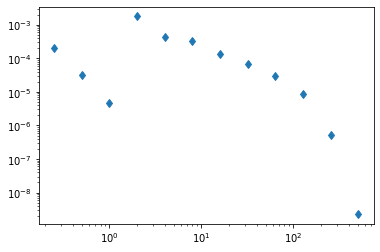

In [ ]:
plt.plot(kn[2:-2],np.abs(Sdispari),'d')
plt.loglog()

In [132]:
plt.figure(figsize=(14,10))
Uf3=np.abs(Uf[2:-2])
S1=np.mean(((Uf3)),1)
S2=np.mean((Uf3)**2,1)
S3=np.mean((Uf3)**3,1)
S4=np.mean((Uf3)**4,1)
S5=np.mean((Uf3)**5,1)
S6=np.mean((Uf3)**6,1)
S7=np.mean((Uf3)**7,1)
S8=np.mean((Uf3)**8,1)
S9=np.mean((Uf3)**9,1)
S10=np.mean((Uf3)**10,1)
S12=np.mean((Uf3)**12,1)
S14=np.mean((Uf3)**14,1)


print(len(S2),len(S4)) 

20 20


<Figure size 1008x720 with 0 Axes>

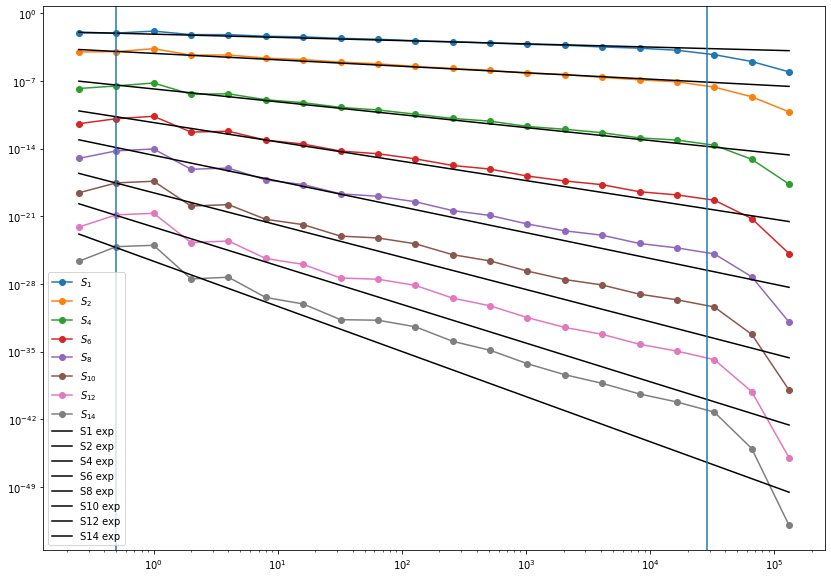

In [136]:
plt.figure(figsize=(14,10))

#plt.plot(kn[2:-2],S1,'o-',label='S1')
plt.plot((kn[2:-2]),(S1),'o-',label=r'$S_1$')
plt.plot((kn[2:-2]),(S2),'o-',label=r'$S_2$')
plt.plot((kn[2:-2]),(S4),'o-',label=r'$S_4$')
plt.plot((kn[2:-2]),(S6),'o-',label=r'$S_6$')
plt.plot((kn[2:-2]),(S8),'o-',label=r'$S_8$')
plt.plot((kn[2:-2]),(S10),'o-',label=r'$S_{10}$')
plt.plot((kn[2:-2]),(S12),'o-',label=r'$S_{12}$')
plt.plot((kn[2:-2]),(S14),'o-',label=r'$S_{14}$')


plt.plot(kn[2:-2],np.mean(S1[:8])*kn[2:-2]**(-1/3.),label='S1 exp',color='black')
plt.plot(kn[2:-2],np.mean(S2[:8])*kn[2:-2]**(-2/3.),label='S2 exp',color='black')
plt.plot(kn[2:-2],np.mean(S4[:8])*kn[2:-2]**(-4/3.),label='S4 exp',color='black')
plt.plot(kn[2:-2],np.mean(S6[:8])*kn[2:-2]**(-6/3.),label='S6 exp',color='black')
plt.plot(kn[2:-2],np.mean(S8[:8])*kn[2:-2]**(-8/3.),label='S8 exp',color='black')
plt.plot(kn[2:-2],np.mean(S10[:1])*kn[2:-2]**(-10/3.),label='S10 exp',color='black')
plt.plot(kn[2:-2],np.mean(S12[:1])*kn[2:-2]**(-12/3.),label='S12 exp',color='black')
plt.plot(kn[2:-2],np.mean(S14[:1])*kn[2:-2]**(-14/3.),label='S14 exp',color='black')


#plt.plot((knn[2:-2]),knn[2:-2]*(np.abs(Sdispari)),'o-',label='S3')
#plt.plot((knn[2:-2]),(knn[2:-2]**(-1.)),'o-',label='k^-1')

#plt.plot(np.log2(knn[2:-2]),np.log2(S4),'o-',label='S4')
#plt.plot(knn[2:-2],kn[2:-2]**(-0.720),label='power law')
#plt.plot(knn[2:-2],kn[2:-2]**(-1.7),label='power law')

#plt.yscale('log')

#plt.plot(kn[2:-2],kn[2:-2]**0.00003242,'o-',label='k**-2')
#plt.plot(kn[2:-2],func(kn[2:-2], *popt))
#plt.plot(S3,'o-',label='S3')
#plt.plot(kn[2:-2],S4,'o-',label='S4')
#plt.plot(S5,'o-',label='S5')
#plt.plot(kn[2:-2],S6,'o-',label='S6')
#plt.plot(S7,'o-',label='S7')
#plt.plot(kn[2:-2],S8,'o-',label='S8')
#plt.plot(S9,'o-',label='S9')
#plt.xlim([1e-1,1])
#plt.ylim(5e-20,5e-1)
plt.axvline(x=1/eta)
plt.axvline(x=kn[3])
plt.loglog()#basex=2, basey=2)
plt.legend()
plt.show()

In [ ]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(func, kn[2:-2],S2,bounds=(-5,[1,-2,1]))
popt

array([ 0.1909241 , -2.        ,  0.59000107])

In [ ]:
np.set_printoptions(suppress=True)

np.round(S2, decimals=8, out=None)

array([0.00009967, 0.72494462, 0.00007771, 0.00011172, 0.00000019,
       0.00000003, 0.00000001, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [ ]:
--- prove ---

SyntaxError: ignored

In [ ]:
import seaborn as sns